## Categorical Plot
### seaborn.catplot
seaborn.catplot(x=None, y=None, hue=None, data=None, row=None, col=None, col_wrap=None, estimator=<function mean at 0x105c7d9e0>, ci=95, n_boot=1000, units=None, seed=None, order=None, hue_order=None, row_order=None, col_order=None, kind='strip', height=5, aspect=1, orient=None, color=None, palette=None, legend=True, legend_out=True, sharex=True, sharey=True, margin_titles=False, facet_kws=None, **kwargs)
Figure-level interface for drawing categorical plots onto a FacetGrid.

This function provides access to several axes-level functions that show the relationship between a numerical and one or more categorical variables using one of several visual representations. The kind parameter selects the underlying axes-level function to use:

Categorical scatterplots:

stripplot() (with kind="strip"; the default)

swarmplot() (with kind="swarm")

Categorical distribution plots:

boxplot() (with kind="box")

violinplot() (with kind="violin")

boxenplot() (with kind="boxen")

Categorical estimate plots:

pointplot() (with kind="point")

barplot() (with kind="bar")

countplot() (with kind="count")

Extra keyword arguments are passed to the underlying function, so you should refer to the documentation for each to see kind-specific options.

Note that unlike when using the axes-level functions directly, data must be passed in a long-form DataFrame with variables specified by passing strings to x, y, hue, etc.

As in the case with the underlying plot functions, if variables have a categorical data type, the the levels of the categorical variables, and their order will be inferred from the objects. Otherwise you may have to use alter the dataframe sorting or use the function parameters (orient, order, hue_order, etc.) to set up the plot correctly.

This function always treats one of the variables as categorical and draws data at ordinal positions (0, 1, … n) on the relevant axis, even when the data has a numeric or date type.

See the tutorial for more information.

After plotting, the FacetGrid with the plot is returned and can be used directly to tweak supporting plot details or add other layers.

Parameters
x, y, huenames of variables in data
Inputs for plotting long-form data. See examples for interpretation.

dataDataFrame
Long-form (tidy) dataset for plotting. Each column should correspond to a variable, and each row should correspond to an observation.

row, colnames of variables in data, optional
Categorical variables that will determine the faceting of the grid.

col_wrapint, optional
“Wrap” the column variable at this width, so that the column facets span multiple rows. Incompatible with a row facet.

estimatorcallable that maps vector -> scalar, optional
Statistical function to estimate within each categorical bin.

cifloat or “sd” or None, optional
Size of confidence intervals to draw around estimated values. If “sd”, skip bootstrapping and draw the standard deviation of the observations. If None, no bootstrapping will be performed, and error bars will not be drawn.

n_bootint, optional
Number of bootstrap iterations to use when computing confidence intervals.

unitsname of variable in data or vector data, optional
Identifier of sampling units, which will be used to perform a multilevel bootstrap and account for repeated measures design.

seedint, numpy.random.Generator, or numpy.random.RandomState, optional
Seed or random number generator for reproducible bootstrapping.

order, hue_orderlists of strings, optional
Order to plot the categorical levels in, otherwise the levels are inferred from the data objects.

row_order, col_orderlists of strings, optional
Order to organize the rows and/or columns of the grid in, otherwise the orders are inferred from the data objects.

kindstring, optional
The kind of plot to draw (corresponds to the name of a categorical plotting function. Options are: “point”, “bar”, “strip”, “swarm”, “box”, “violin”, or “boxen”.

heightscalar, optional
Height (in inches) of each facet. See also: aspect.

aspectscalar, optional
Aspect ratio of each facet, so that aspect * height gives the width of each facet in inches.

orient“v” | “h”, optional
Orientation of the plot (vertical or horizontal). This is usually inferred from the dtype of the input variables, but can be used to specify when the “categorical” variable is a numeric or when plotting wide-form data.

colormatplotlib color, optional
Color for all of the elements, or seed for a gradient palette.

palettepalette name, list, or dict, optional
Colors to use for the different levels of the hue variable. Should be something that can be interpreted by color_palette(), or a dictionary mapping hue levels to matplotlib colors.

legendbool, optional
If True and there is a hue variable, draw a legend on the plot.

legend_outbool, optional
If True, the figure size will be extended, and the legend will be drawn outside the plot on the center right.

share{x,y}bool, ‘col’, or ‘row’ optional
If true, the facets will share y axes across columns and/or x axes across rows.

margin_titlesbool, optional
If True, the titles for the row variable are drawn to the right of the last column. This option is experimental and may not work in all cases.

facet_kwsdict, optional
Dictionary of other keyword arguments to pass to FacetGrid.

kwargskey, value pairings
Other keyword arguments are passed through to the underlying plotting function.

Returns
gFacetGrid
Returns the FacetGrid object with the plot on it for further tweaking.

Examples

Draw a single facet to use the FacetGrid legend placement:

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
exercise = sns.load_dataset('exercise')
exercise.head()

,Unnamed: 0,id,diet,pulse,time,kind
0,0,1,low fat,85,1 min,rest
1,1,1,low fat,85,15 min,rest
2,2,1,low fat,88,30 min,rest
3,3,2,low fat,90,1 min,rest
4,4,2,low fat,92,15 min,rest


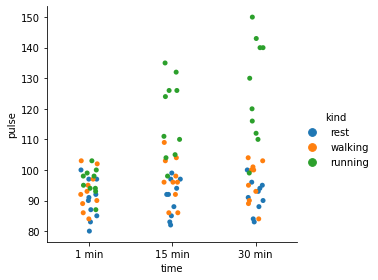

In [2]:
sns.catplot(x='time', y='pulse',height=4, aspect=1.1, hue='kind',data=exercise)
plt.show()

Use a different plot kind to visualize the same data:

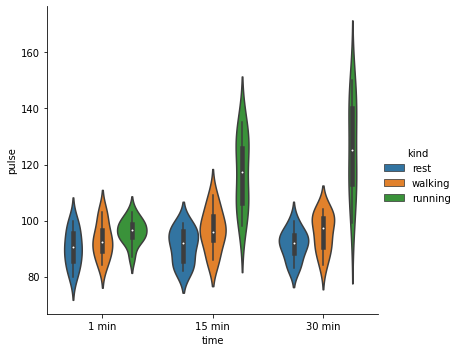

In [3]:
sns.catplot(x='time', y='pulse',hue='kind', height=5, aspect=1.1, data=exercise, kind='violin')
plt.show()

Facet along the columns to show a third categorical variable:

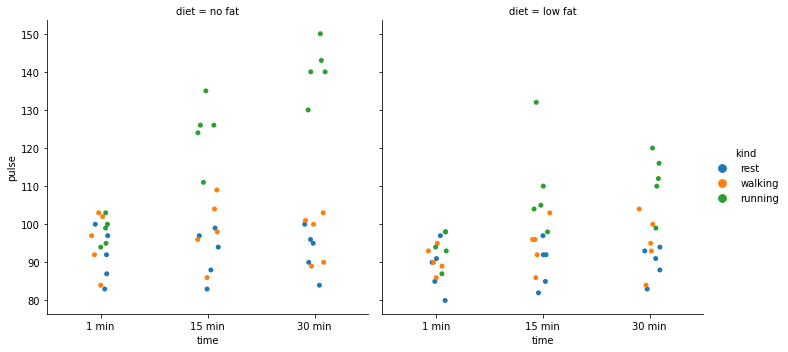

In [4]:
sns.catplot(x='time', y='pulse', hue='kind', col='diet', data=exercise)
plt.show()

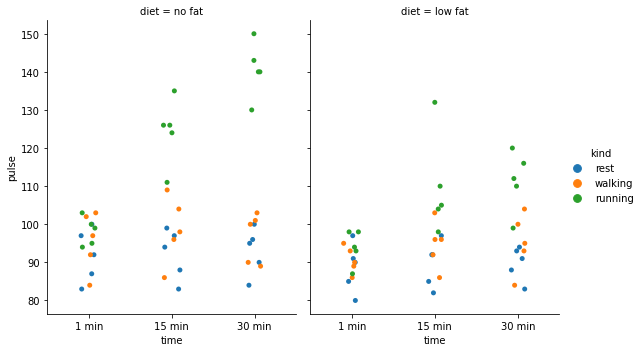

In [5]:
#Use a different height and aspect ratio for the facets:

g = sns.catplot(x="time", y="pulse", hue="kind",
                col="diet", data=exercise,
                height=5, aspect=.8)

In [6]:
#Make many column facets and wrap them into the rows of the grid:
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


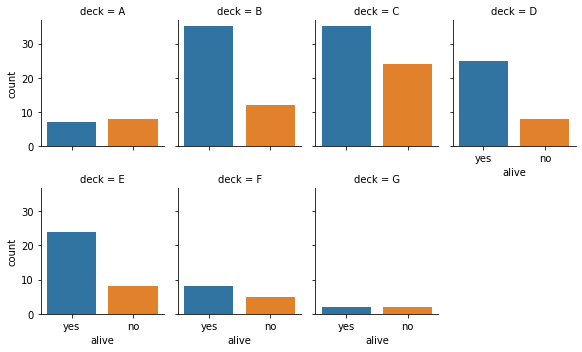

In [11]:
sns.catplot(x='alive', col='deck',col_wrap=4,
            data=titanic[titanic.deck.notnull()], kind='count', height=2.5, aspect=0.8)
plt.show()

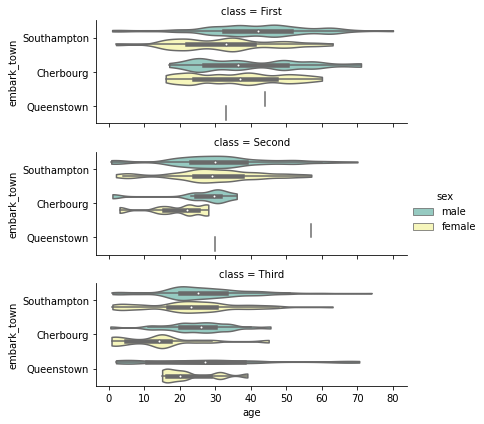

In [21]:
sns.catplot(x='age', y='embark_town', hue='sex', row='class', 
            data=titanic[titanic.embark_town.notnull()]
            ,kind='violin', height=2, aspect=3,
           palette='Set3',bw=0.2,cut=0)
plt.show()

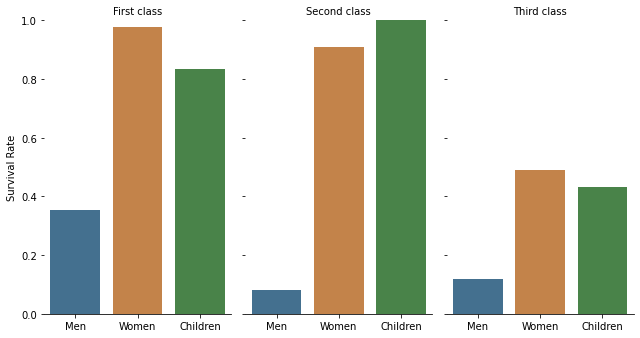

In [22]:
g = sns.catplot(x="who", y="survived", col="class",
                data=titanic, saturation=.5,
                kind="bar", ci=None, aspect=.6)
(g.set_axis_labels("", "Survival Rate")
  .set_xticklabels(["Men", "Women", "Children"])
  .set_titles("{col_name} {col_var}")
  .set(ylim=(0, 1))
  .despine(left=True)) 